In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps, ImageFilter, ImageEnhance
from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs
import cv2
import tensorflow as tf
import os
import pandas as pd

2024-02-07 14:36:46.861978: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-07 14:36:46.863536: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-07 14:36:46.883514: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-07 14:36:46.883534: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-07 14:36:46.884197: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 10

In [4]:
img = np.array(Image.open("../leaves/images/Grape_spot/image (1014).JPG", "r"))

In [5]:
colospace = pcv.visualize.colorspaces(rgb_img=img)

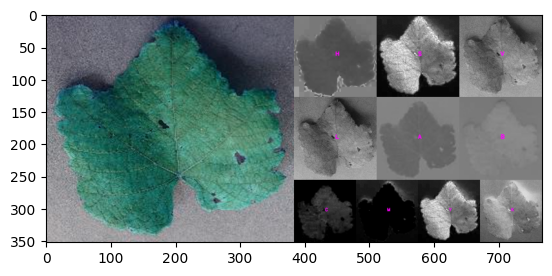

In [6]:
pcv.plot_image(colospace)

In [7]:
gray_img = pcv.rgb2gray_cmyk(rgb_img=img, channel='y')

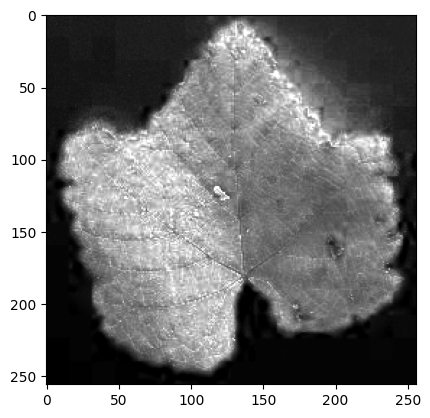

In [8]:
pcv.plot_image(gray_img)

In [9]:
pcv.visualize.histogram(img = img)

alt.Chart(...)

In [10]:
channels = cv2.split(img)

[[146 107  98 ... 111 110 109]
 [114 109 124 ... 113 110 105]
 [141 130  93 ... 112 109 104]
 ...
 [171 165 162 ... 166 164 170]
 [173 167 164 ... 166 165 170]
 [164 170 181 ... 170 167 170]]
[[146 107  98 ... 111 110 109]
 [114 109 124 ... 113 110 105]
 [141 130  93 ... 112 109 104]
 ...
 [171 165 162 ... 166 164 170]
 [173 167 164 ... 166 165 170]
 [164 170 181 ... 170 167 170]]
[[131  92  83 ...  97  96  95]
 [ 99  94 109 ...  99  96  91]
 [126 115  78 ...  98  95  90]
 ...
 [169 163 160 ... 162 160 166]
 [171 165 162 ... 162 161 166]
 [162 168 179 ... 166 163 166]]
[[131  92  83 ...  97  96  95]
 [ 99  94 109 ...  99  96  91]
 [126 115  78 ...  98  95  90]
 ...
 [169 163 160 ... 162 160 166]
 [171 165 162 ... 162 161 166]
 [162 168 179 ... 166 163 166]]
[[126 126 126 ... 120 120 120]
 [126 126 126 ... 120 120 120]
 [126 126 126 ... 120 120 120]
 ...
 [160 160 160 ... 128 128 128]
 [160 160 160 ... 128 128 128]
 [160 160 160 ... 128 128 128]]
[[142 102  92 ... 106 105 104]
 [109 104

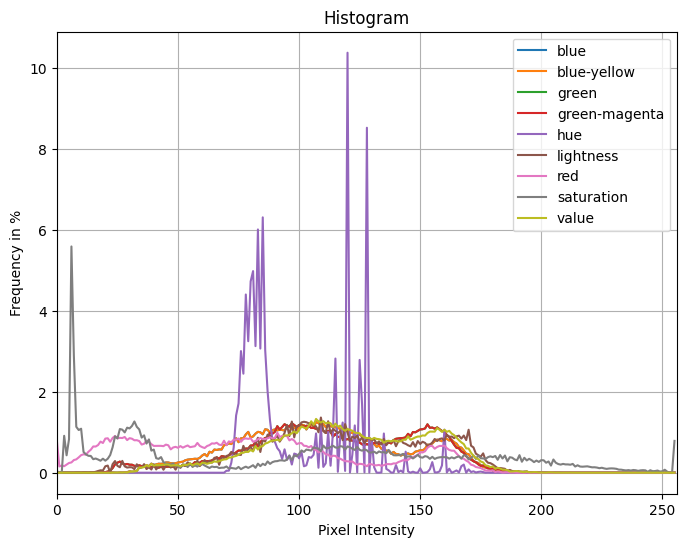

In [11]:
def histogram_with_colors(img, color_spaces):
    plt.figure(figsize=(8, 6))

    for color_space in color_spaces:
        if color_space == "blue":
            channel = img[1:, :, 0]
        # elif color_space == "blue-yellow":
        #     blue_yellow = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)[:, :, 2]
        #     channel = cv2.subtract(img[:, :, 2], blue_yellow)
        elif color_space == "green":
            channel = img[1:, :, 1]
        # elif color_space == "green-magenta":
        #     green_magenta = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)[:, :, 1]
        #     channel = cv2.subtract(img[:, :, 1], green_magenta)
        elif color_space == "hue":
            hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
            channel = hsv[1:, :, 0]
        elif color_space == "lightness":
            lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
            channel = lab[1:, :, 0]
        elif color_space == "red":
            channel = img[1:, :, 2]
        elif color_space == "saturation":
            hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
            channel = hsv[1:, :, 1]
        elif color_space == "value":
            hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
            channel = hsv[1:, :, 2]
        print(channel)
        hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
        hist = hist / np.sum(hist) * 100
        plt.plot(hist, label= color_space)


    plt.title('Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency in %')
    plt.xlim([0, 256])
    plt.grid(True)
    plt.legend()
    plt.show()

# Usage:
# Assuming 'img' is your BGR image
histogram_with_colors(img, color_spaces=["blue", "blue-yellow", "green", "green-magenta", "hue", "lightness", "red", "saturation", "value"])

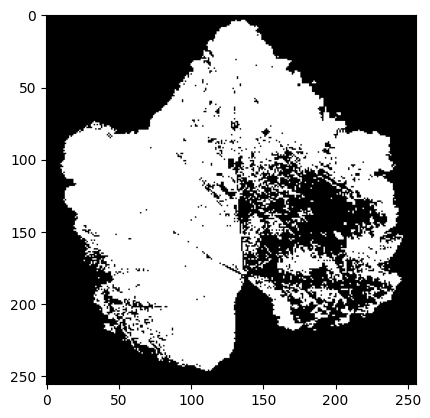

In [12]:
thresh = pcv.threshold.binary(gray_img=gray_img, threshold=115, object_type="light")
pcv.plot_image(thresh)

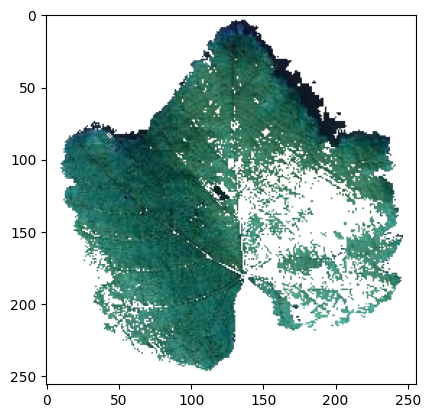

In [13]:
result = np.ones_like(img) * 255
result[thresh == 255] = img[thresh == 255]
mask = result
pcv.plot_image(mask)

In [14]:
result = np.ones_like(img) * 255
result[thresh == 255] = img[thresh == 255]
green = result
green[thresh == 0] = [93, 255, 51]
roi = pcv.roi.rectangle(img=green, x=0, y=0, h=256, w=256)
pcv.plot_image(roi)

RuntimeError: Plotting <class 'plantcv.plantcv.classes.Objects'> is not supported.